In [53]:
import numpy as np
import matplotlib.pyplot as plt

def decode_sequence(signal):
    ans = []
    for idx in range(0, len(signal), 6):
        tail_idx = idx + 6
        if tail_idx > len(signal):
            break
        fft_output = np.fft.fft(signal[idx:tail_idx])
        if fft_output[2] >= fft_output[3]:
            ans.append(0)
        else:
            ans.append(1)
    return ans

In [7]:
intensity_file = "intensity.txt"
inst_data = []
with open(intensity_file, 'r') as input_file:
    for line in input_file:
        parsed = line.strip().split(' ')
        if len(parsed) >= 3 and parsed[0] == 'average' and parsed[1] == 'color':
            inst_data.append(float(parsed[2]))

In [8]:
len(inst_data)

439

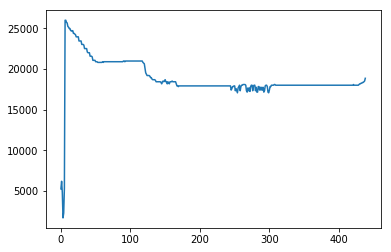

In [22]:
plt.plot(inst_data)
# plt.xlim(240, 310)
# plt.ylim(17000, 18500)

(17000, 18500)

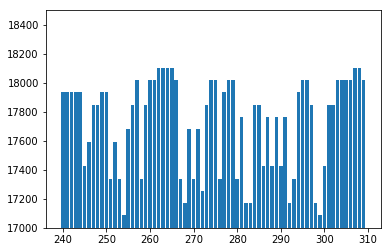

In [21]:
plt.bar(range(240, 310), inst_data[240:310])
plt.ylim(17000, 18500)

In [23]:
start_idx = 243
np.absolute(np.fft.fft(inst_data[start_idx:(start_idx + 12)]))

array([2.11820000e+05, 1.25365850e+03, 1.19000000e+03, 8.75128562e+02,
       1.36000000e+03, 4.69191195e+02, 1.70000000e+02, 4.69191195e+02,
       1.36000000e+03, 8.75128562e+02, 1.19000000e+03, 1.25365850e+03])

In [34]:
start_idx = 244
np.absolute(np.fft.fft(inst_data[start_idx:(start_idx + 12)]))

array([211565.        ,   1443.23921574,    957.90135191,    783.66127887,
         1252.12818833,    235.92491632,    425.        ,    235.92491632,
         1252.12818833,    783.66127887,    957.90135191,   1443.23921574])

## Evaluation

In [69]:
# ground truth
data_sequences = [[0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1],
 [0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1],
 [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1],
 [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1],
 [0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1],
 [0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1],
 [0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
 [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1],
 [0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0]]
correct_data_sequences = [i[3:] for i in data_sequences]

In [101]:
def accuracy_for_one(correct_data_sequences, input_sequences):
    a = np.array(correct_data_sequences)
    b = np.array(input_sequences)
    # print(a.shape, b.shape)
    assert a.shape == b.shape
    w, h = a.shape
    return 1 - np.count_nonzero(a - b) / (w * h)

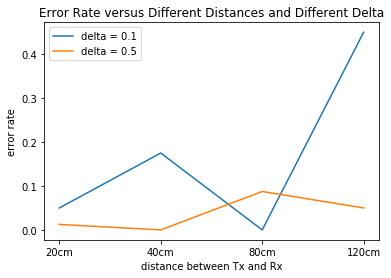

In [106]:
import matplotlib.pyplot as plt
accu_delta_1_20 = accuracy_for_one(correct_data_sequences, delta_1_20)
accu_delta_1_40 = accuracy_for_one(correct_data_sequences, delta_1_40)
accu_delta_1_80 = accuracy_for_one(correct_data_sequences, delta_1_80)
accu_delta_1_120 = accuracy_for_one(correct_data_sequences, delta_1_120)
plt.plot(["20cm", "40cm", "80cm", "120cm"], [1 - accu_delta_1_20, 1 - accu_delta_1_40, 1 - accu_delta_1_80, 1 - accu_delta_1_120], label="delta = 0.1")

accu_delta_5_20 = accuracy_for_one(correct_data_sequences, delta_5_20)
accu_delta_5_40 = accuracy_for_one(correct_data_sequences, delta_5_40)
accu_delta_5_80 = accuracy_for_one(correct_data_sequences, delta_5_80)
accu_delta_5_120 = accuracy_for_one(correct_data_sequences, delta_5_120)
plt.plot(["20cm", "40cm", "80cm", "120cm"], [1 - accu_delta_5_20, 1 - accu_delta_5_40, 1 - accu_delta_5_80, 1 - accu_delta_5_120], label="delta = 0.5")
plt.legend()
plt.xlabel('distance between Tx and Rx')
plt.ylabel('error rate')
plt.title("Error Rate versus Different Distances and Different Delta")
plt.savefig("error_rate_vs_dis.png")

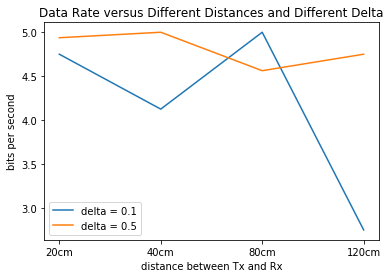

In [107]:
n_seq, len_seq = np.shape(correct_data_sequences)
# parity bit does not count
tot_data = n_seq * (len_seq - 1)
tot_time = 14
avg_rate = tot_data / tot_time
plt.plot(["20cm", "40cm", "80cm", "120cm"], [avg_rate * accu_delta_1_20, avg_rate * accu_delta_1_40, avg_rate * accu_delta_1_80, avg_rate * accu_delta_1_120], label="delta = 0.1")
plt.plot(["20cm", "40cm", "80cm", "120cm"], [avg_rate * accu_delta_5_20, avg_rate * accu_delta_5_40, avg_rate * accu_delta_5_80, avg_rate * accu_delta_5_120], label="delta = 0.5")
plt.legend()
plt.title("Data Rate versus Different Distances and Different Delta")
plt.xlabel('distance between Tx and Rx')
plt.ylabel('bits per second')
plt.savefig("data_rate_vs_dis.png")


In [87]:
np.count_nonzero(correct_data_sequences)

40

In [97]:
# data loading for zoom disabled
delta_1_20 =\
    [[0, 1, 1, 0, 1, 0, 0, 1],
    [1, 0, 0, 1, 0, 1, 0, 1],
    [0, 0, 0, 1, 0, 0, 0, 1],
    [0, 1, 0, 0, 0, 0, 0, 1],
    [0, 1, 1, 0, 1, 1, 1, 1],
    [0, 1, 0, 0, 0, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 1, 0, 0, 0, 0, 1],
    [1, 1, 1, 1, 1, 1, 0, 0],
    [1, 0, 0, 0, 0, 1, 0, 1],]

delta_1_40 =\
    [[0, 1, 1, 1, 0, 0, 1, 1],
    [0, 1, 0, 1, 0, 1, 1, 0],
    [0, 0, 0, 1, 0, 0, 0, 1],
    [0, 1, 0, 0, 0, 0, 0, 1],
    [0, 1, 1, 0, 1, 1, 1, 1],
    [0, 1, 0, 0, 0, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 1, 0, 0, 0, 0, 1],
    [1, 1, 1, 1, 1, 1, 0, 0],
    [0, 0, 0, 0, 1, 0, 1, 0],]

delta_1_80 = np.zeros((10, 8))

delta_1_120 = np.zeros((10, 8))

delta_5_20 =\
    [[0, 1, 1, 0, 1, 0, 0, 1],
    [1, 0, 0, 1, 0, 1, 0, 1],
    [0, 0, 0, 1, 0, 0, 0, 1],
    [0, 1, 0, 0, 0, 0, 0, 1],
    [0, 1, 1, 0, 1, 1, 1, 1],
    [0, 1, 0, 0, 0, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 1, 0, 0, 0, 0, 1],
    [1, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 0, 1, 0],]

delta_5_40 =\
    [[0, 0, 1, 1, 0, 0, 1, 1],
    [0, 0, 1, 0, 0, 1, 1, 1],
    [0, 0, 0, 1, 0, 0, 0, 1],
    [0, 1, 0, 0, 0, 0, 0, 1],
    [0, 1, 1, 0, 1, 1, 1, 1],
    [0, 1, 0, 0, 0, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 1, 0, 0, 0, 0, 1],
    [1, 1, 1, 1, 1, 1, 0, 0],
    [0, 0, 0, 0, 1, 0, 1, 0],]

delta_5_80 =\
    [[0, 1, 1, 0, 1, 0, 0, 1],
    [1, 0, 0, 1, 0, 1, 0, 1],
    [0, 0, 0, 1, 0, 0, 0, 1],
    [0, 1, 0, 0, 0, 0, 0, 1],
    [0, 1, 1, 0, 1, 1, 1, 1],
    [0, 1, 0, 0, 0, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 1, 0, 0, 0, 0, 1],
    [1, 1, 1, 1, 1, 1, 0, 0],
    [0, 0, 0, 0, 1, 0, 1, 0],]

delta_5_120 =\
    [[0, 1, 1, 0, 1, 0, 0, 1],
    [0, 1, 0, 1, 0, 1, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 1, 0, 1, 1],
    [0, 0, 0, 0, 1, 0, 1, 1],
    [0, 0, 1, 1, 1, 0, 0, 1],
    [0, 0, 1, 0, 0, 0, 0, 1],
    [1, 1, 1, 1, 1, 1, 0, 0],
    [1, 1, 1, 1, 1, 1, 1, 1],]

### Data loading with zoom enabled

In [104]:
## Data loading for delta of 0.1
delta_1_20 = \
    [[0, 1, 1, 0, 0, 0, 0, 0],
    [1, 0, 0, 1, 0, 1, 0, 1],
    [0, 0, 0, 1, 0, 0, 0, 1],
    [0, 1, 0, 0, 0, 0, 0, 1],
    [0, 1, 1, 0, 1, 1, 1, 1],
    [0, 1, 0, 0, 0, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 1, 0, 0, 0, 0, 1],
    [1, 0, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 0, 1, 0]]

delta_1_40 = \
    [[0, 0, 1, 0, 1, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 0, 1],
    [0, 0, 1, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 1, 0, 1, 1],
    [0, 1, 1, 1, 0, 0, 1, 1],
    [0, 1, 0, 0, 0, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 1, 0, 0, 0, 0, 1],
    [1, 1, 1, 1, 1, 1, 0, 0],
    [0, 0, 0, 0, 1, 0, 1, 0]]

delta_1_80 = \
    [[0, 1, 1, 0, 1, 0, 0, 1],
    [1, 0, 0, 1, 0, 1, 0, 1],
    [0, 0, 0, 1, 0, 0, 0, 1],
    [0, 1, 0, 0, 0, 0, 0, 1],
    [0, 1, 1, 0, 1, 1, 1, 1],
    [0, 1, 0, 0, 0, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 1, 0, 0, 0, 0, 1],
    [1, 1, 1, 1, 1, 1, 0, 0],
    [0, 0, 0, 0, 1, 0, 1, 0]]

delta_1_120 = \
    [[1, 0, 1, 1, 1, 0, 0, 0],
    [1, 0, 0, 1, 0, 1, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 1, 1, 1],
    [1, 1, 0, 0, 0, 0, 1, 1],
    [0, 1, 0, 0, 0, 1, 1, 0],
    [0, 0, 0, 0, 1, 0, 0, 1],
    [0, 0, 1, 0, 1, 1, 0, 0],
    [0, 0, 0, 0, 0, 1, 1, 1],
    [0, 1, 1, 0, 1, 1, 0, 1]]

In [105]:
delta_5_20 =\
    [[0, 0, 1, 0, 1, 0, 0, 1],
    [1, 0, 0, 1, 0, 1, 0, 1],
    [0, 0, 0, 1, 0, 0, 0, 1],
    [0, 1, 0, 0, 0, 0, 0, 1],
    [0, 1, 1, 0, 1, 1, 1, 1],
    [0, 1, 0, 0, 0, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 1, 0, 0, 0, 0, 1],
    [1, 1, 1, 1, 1, 1, 0, 0],
    [0, 0, 0, 0, 1, 0, 1, 0]]
delta_5_40 =\
    [[0, 1, 1, 0, 1, 0, 0, 1],
    [1, 0, 0, 1, 0, 1, 0, 1],
    [0, 0, 0, 1, 0, 0, 0, 1],
    [0, 1, 0, 0, 0, 0, 0, 1],
    [0, 1, 1, 0, 1, 1, 1, 1],
    [0, 1, 0, 0, 0, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 1, 0, 0, 0, 0, 1],
    [1, 1, 1, 1, 1, 1, 0, 0],
    [0, 0, 0, 0, 1, 0, 1, 0],]
delta_5_80 =\
    [[0, 0, 0, 1, 0, 0, 0, 1],
    [1, 0, 0, 1, 0, 1, 0, 1],
    [1, 0, 1, 1, 0, 0, 0, 1],
    [0, 1, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 0, 1, 1, 1, 1],
    [0, 1, 0, 0, 0, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 1, 0, 0, 0, 0, 1],
    [1, 1, 1, 1, 1, 1, 0, 0],
    [0, 0, 0, 0, 1, 0, 1, 0]]
delta_5_120 =\
    [[0, 0, 1, 0, 1, 0, 1, 1],
    [0, 0, 1, 1, 0, 1, 0, 1],
    [0, 0, 0, 1, 0, 0, 0, 1],
    [0, 1, 0, 0, 0, 0, 0, 1],
    [0, 1, 1, 0, 1, 1, 1, 1],
    [0, 1, 0, 0, 0, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 1, 0, 0, 0, 0, 1],
    [1, 1, 1, 1, 1, 1, 0, 0],
    [0, 0, 0, 0, 1, 0, 1, 0]]